In [1]:
import sys 

import os 
import random

import numpy as np 
import pandas as pd 

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objects as go
from plotly import offline as pyoff
RANDOM_STATE = 42
from datetime import date
import calendar
import datetime as dt
from datetime import datetime

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
file_dir = ''

In [4]:
mejores_clientes = pd.read_csv('definitivo_10000clientes.csv')

In [5]:
mejores_clientes.head()

,pk_cid,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
0,1374819,505,0,17,4290.0,4,1,1,4,411,28.0,121839.00000,38.0,2.0,8.0,0.0,1.0
1,1392320,408,0,14,3190.0,4,1,1,4,411,28.0,107353.08000,27.0,1.0,7.0,1.0,1.0
2,1377496,492,0,17,2880.0,4,1,1,4,411,28.0,101396.49000,28.0,1.0,6.0,0.0,1.0
3,1374123,508,0,17,2850.0,4,1,1,4,411,28.0,113652.32033,52.0,2.0,6.0,0.0,1.0
4,1374403,506,0,17,2840.0,4,1,1,4,411,28.0,90748.62000,51.0,1.0,6.0,0.0,1.0


In [6]:
mejores_clientes["salary"] = mejores_clientes["salary"].astype(int)

In [7]:
mejores_clientes["age"] = mejores_clientes["age"].astype(int)

In [8]:
mejores_clientes["gender"] = mejores_clientes["gender"].astype(int)

In [9]:
mejores_clientes["region_code"] = mejores_clientes["region_code"].astype(int)

In [10]:
mejores_clientes.head()

,pk_cid,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
0,1374819,505,0,17,4290.0,4,1,1,4,411,28,121839,38,2,8.0,0.0,1.0
1,1392320,408,0,14,3190.0,4,1,1,4,411,28,107353,27,1,7.0,1.0,1.0
2,1377496,492,0,17,2880.0,4,1,1,4,411,28,101396,28,1,6.0,0.0,1.0
3,1374123,508,0,17,2850.0,4,1,1,4,411,28,113652,52,2,6.0,0.0,1.0
4,1374403,506,0,17,2840.0,4,1,1,4,411,28,90748,51,1,6.0,0.0,1.0


In [11]:
mejores_clientes['recency1'] = pd.qcut(mejores_clientes['recency'], q=5, labels=range(5))
mejores_clientes['monetary_value1'] = pd.qcut(mejores_clientes['monetary_value'], q=5, labels=range(5))
mejores_clientes['frequency1'] = (mejores_clientes['frequency'] > 1).astype(int)


In [12]:
mejores_clientes.head(2).T

,0,1
pk_cid,1374819,1392320
recency,505,408
ingesta,0,0
frequency,17,14
monetary_value,4290,3190
r_quartile,4,4
f_quartile,1,1
m_quartile,1,1
i_quartile,4,4
RFMScore,411,411


In [13]:
mejores_clientes.pivot_table(index='recency1', values=['recency'], aggfunc=[len, np.median])

,len,median
,recency,recency
recency1,,
0,2389,319
1,2435,371
2,2359,415
3,2457,458
4,2265,492


In [14]:
##Los subgrupos,según el recency, de la lista de los 10000 clientes, son:
## 0, hasta un recency de 319, 1 hasta un recency de 371
## 2, hasta un recency de 415, 3 hasta un recency de 458
## 4, hasta un recency de 492

In [15]:
mejores_clientes.pivot_table(index='monetary_value1', values=['monetary_value'], aggfunc=[len, np.mean])

,len,mean
,monetary_value,monetary_value
monetary_value1,,
0,2549.0,226.414280
1,2224.0,383.570144
2,2376.0,592.083333
3,2425.0,797.224742
4,2331.0,1271.389961


In [16]:
##Los subgrupos,según el monetary money, de la lista de los 10000 clientes, son:
## 0, hasta un mean monetary value de 226, 1 hasta un mean monetary de 383
## 2, hasta un mean monetary de 592, 3 hasta un mean monetary de 797
## 4, hasta un mean monetary de 1271

In [17]:
mejores_clientes.pivot_table(index='frequency1', values=['frequency'], aggfunc=[len, np.median])

,len,median
,frequency,frequency
frequency1,,
1,11905,14


In [18]:
##Los subgrupos,según el frecuency, de la lista de los 10000 clientes, solo es el 1, de 14


In [19]:
rm_df = pd.crosstab(mejores_clientes['recency1'], mejores_clientes['monetary_value1'])

In [20]:
rm_df

monetary_value1,0,1,2,3,4
recency1,,,,,
0,575,597,635,403,179
1,505,549,558,555,268
2,467,376,515,581,420
3,523,340,396,464,734
4,479,362,272,422,730


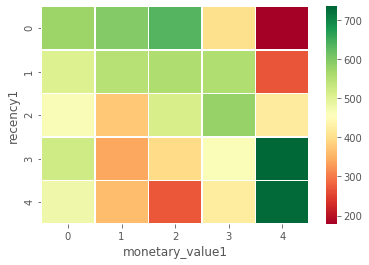

In [21]:
sns.heatmap(rm_df, cmap='RdYlGn', linewidths=0.5)

In [22]:
mejores_clientes_demographic = ['salary','age','gender']

In [23]:
mejores_clientes_demographic1 = mejores_clientes[mejores_clientes_demographic]

In [24]:
mejores_clientes_demographic1.head()

,salary,age,gender
0,121839,38,2
1,107353,27,1
2,101396,28,1
3,113652,52,2
4,90748,51,1


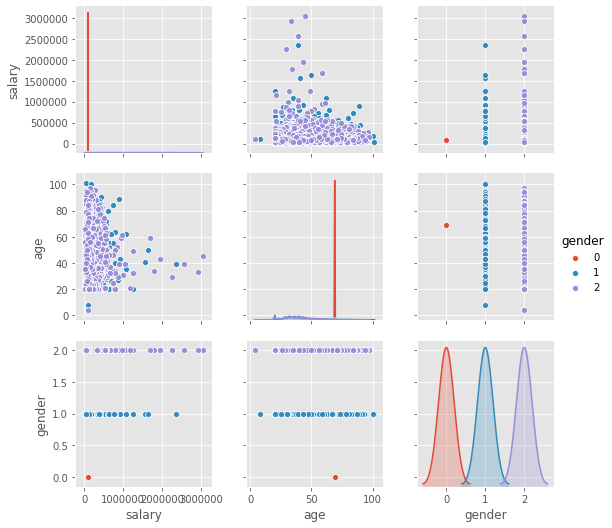

In [25]:
sns.pairplot(mejores_clientes_demographic1,hue='gender', diag_kws={'bw': 0.2})
plt.show()

In [26]:
#aplicacion del algoritmo k-means para poder obtener el cluster de la personalizacion 

In [27]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=4))
        ]
)

In [28]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [29]:
pipe.fit(mejores_clientes[['salary', 'age', 'gender']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [30]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
mejores_clientes['Cluster'] = pipe.predict(mejores_clientes[['salary', 'age', 'gender']])

In [32]:
mejores_clientes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11905 entries, 0 to 11904
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   pk_cid                   11905 non-null  int64   
 1   recency                  11905 non-null  int64   
 2   ingesta                  11905 non-null  int64   
 3   frequency                11905 non-null  int64   
 4   monetary_value           11905 non-null  float64 
 5   r_quartile               11905 non-null  int64   
 6   f_quartile               11905 non-null  int64   
 7   m_quartile               11905 non-null  int64   
 8   i_quartile               11905 non-null  int64   
 9   RFMScore                 11905 non-null  int64   
 10  region_code              11905 non-null  int32   
 11  salary                   11905 non-null  int32   
 12  age                      11905 non-null  int32   
 13  gender                   11905 non-null  int32   
 14  unidad

In [33]:
mejores_clientes.head(2)

,pk_cid,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,...,salary,age,gender,unidades_vendidas_total,em_acount,debit_card,recency1,monetary_value1,frequency1,Cluster
0,1374819,505,0,17,4290.0,4,1,1,4,411,...,121839,38,2,8.0,0.0,1.0,4,4,1,1
1,1392320,408,0,14,3190.0,4,1,1,4,411,...,107353,27,1,7.0,1.0,1.0,2,4,1,0


In [34]:
mejores_clientes_2 =mejores_clientes.groupby('Cluster').agg({
    'salary': 'mean',
    'age': 'median',
    'gender':'median'
})

In [35]:
mejores_clientes_2

,salary,age,gender
Cluster,,,
0,105528.396931,36.0,1
1,103925.006821,36.0,2
2,125323.061404,63.0,2
3,705868.361111,41.5,2


In [40]:
# debido a la aplicación del algoritmo podemos concluir que la mejor forma de poder segmentar las campañas sera: 

#3er modelo de campaña: Destinado al publico Masculino de salario medio de 705000 y 42 años 
#2do modelo de campaña: Destinado al publico Masculino de salario medio de 125000 y 63 años
#1er modelo de campaña: Destinado al publico Femenino  de salario medio de 104000 y 36 años
#0 modelo de campaña: destinado al publico  Masculino  de salario medio de 105000 y 36 años

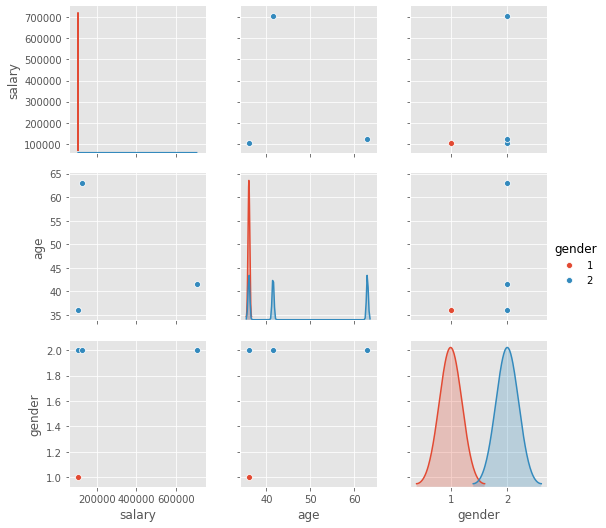

In [37]:
sns.pairplot(mejores_clientes_2,hue='gender', diag_kws={'bw': 0.2})
plt.show()

In [38]:
mejores_clientes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11905 entries, 0 to 11904
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   pk_cid                   11905 non-null  int64   
 1   recency                  11905 non-null  int64   
 2   ingesta                  11905 non-null  int64   
 3   frequency                11905 non-null  int64   
 4   monetary_value           11905 non-null  float64 
 5   r_quartile               11905 non-null  int64   
 6   f_quartile               11905 non-null  int64   
 7   m_quartile               11905 non-null  int64   
 8   i_quartile               11905 non-null  int64   
 9   RFMScore                 11905 non-null  int64   
 10  region_code              11905 non-null  int32   
 11  salary                   11905 non-null  int32   
 12  age                      11905 non-null  int32   
 13  gender                   11905 non-null  int32   
 14  unidad

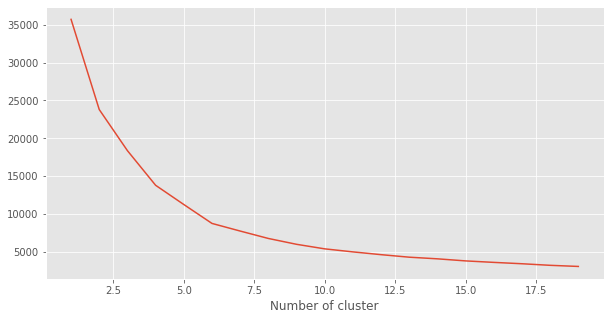

In [39]:
sse = {}

for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(mejores_clientes[['salary', 'age', 'gender']])
    mejores_clientes['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()